In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import scipy
import czifile

In [2]:
fullres = czifile.imread('../129S_94_tiles-2138.czi')

In [3]:
fullres = fullres.squeeze()

In [4]:
fullres.shape

(4, 9625, 9422)

In [5]:
downres_factor = 8

In [6]:
lowres = skimage.transform.downscale_local_mean(fullres, (1, downres_factor, downres_factor))

In [7]:
def find_contour(channel):
    # Blur the image to ignore small lines and stuff
    blur = skimage.filters.gaussian(channel, sigma=10)

    # Separate fore- and background using otsu threshold
    th = skimage.filters.threshold_otsu(blur)
    thresholded = blur > th
    
    # fill holes
    filled = scipy.ndimage.binary_fill_holes(thresholded)
    
    # reduce size of contour at edges so that we are for sure inside the cutting
    erosion = 100
    eroded = skimage.morphology.binary_erosion(filled, np.ones((erosion, erosion)))
    
    # convert binary image to contour line
    contours = skimage.measure.find_contours(eroded, 0.5)
    assert len(contours) == 1
    return contours[0], eroded

contour, lowres_mask = find_contour(lowres[1])

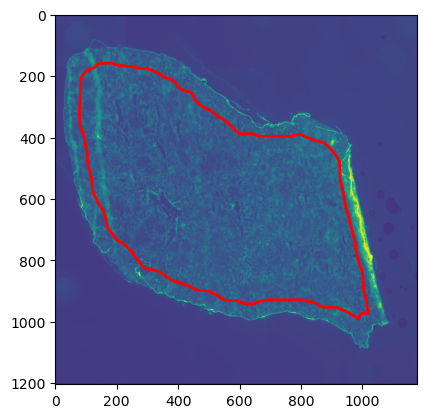

In [8]:
fig, ax = plt.subplots()
ax.imshow(lowres[1])
ax.plot(contour[:, 1], contour[:, 0], linewidth=2, c='r');

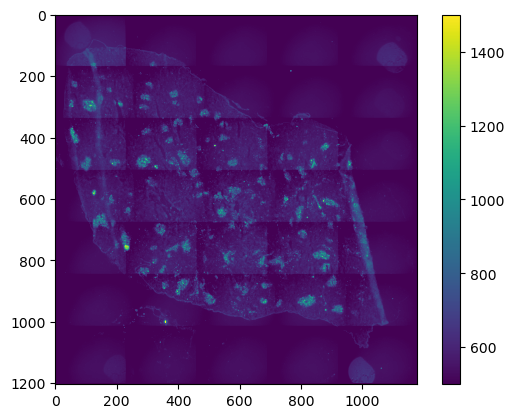

In [13]:
plt.imshow(lowres[3], clim=(500, 1500))
plt.colorbar()

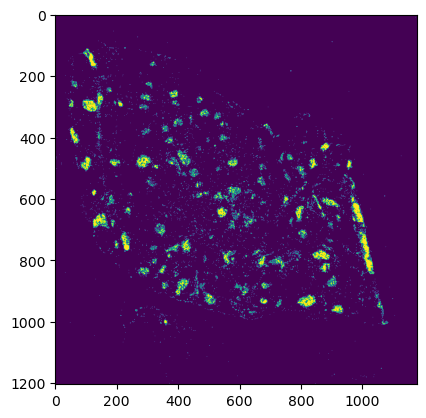

In [48]:
plt.imshow(lowres[3] > 700)

In [49]:
blur = skimage.filters.gaussian(lowres[3] > 700, sigma=5) * lowres_mask

In [67]:
blob_threshold = .2

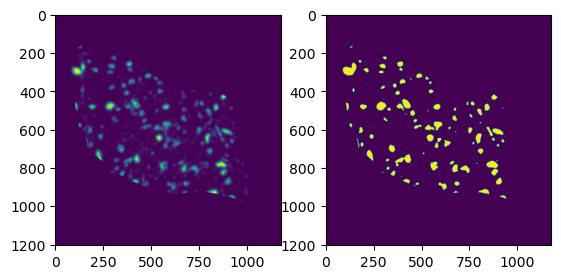

In [68]:
fig, [ax1, ax2] = plt.subplots(1, 2)
ax1.imshow(blur)
ax2.imshow(blur > blob_threshold)

In [69]:
blobs = skimage.measure.find_contours(blur, blob_threshold)

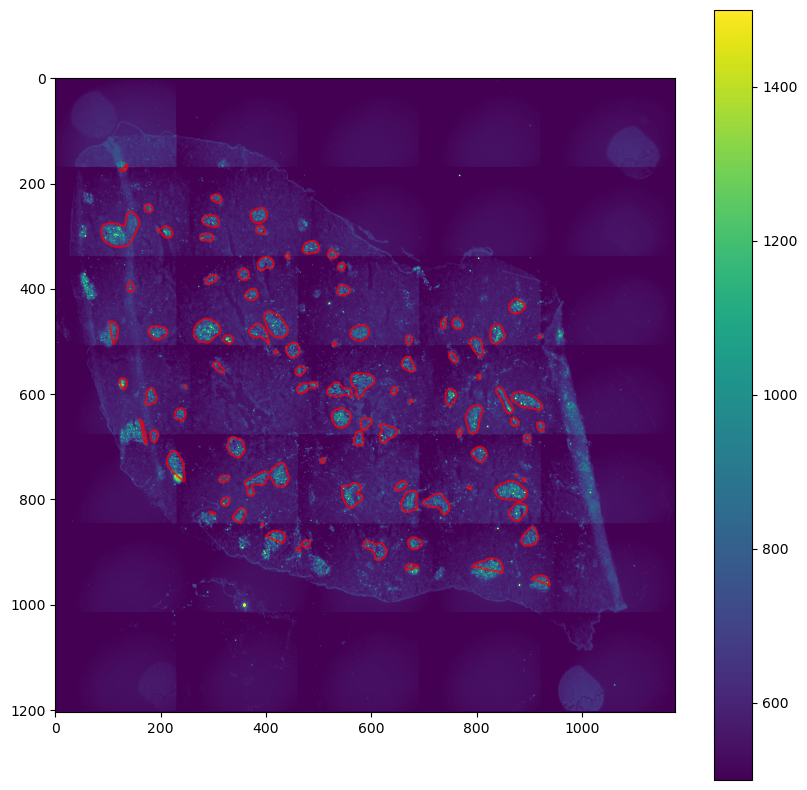

In [74]:
plt.figure(figsize=(10, 10))
plt.imshow(lowres[3], clim=(500, 1500))
plt.colorbar()
for b in blobs:
    plt.plot(b[:, 1], b[:, 0], c='r', alpha=.7)

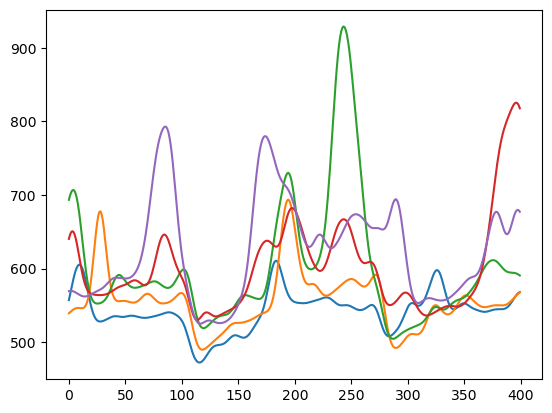

In [40]:
plt.plot(blur[400:800, 500:600:20]);

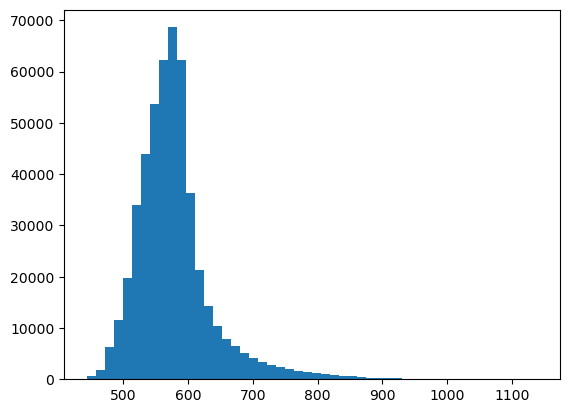

In [27]:
plt.hist(blur[lowres_mask].flatten(), bins=50);